# WSI
## Raport z ćwiczenia laboratoryjnego nr 5
### Kacper Bugała, 303739 i Jan Kuc, 303753

### 1. Cel eksperymentów

Zadanie polega na implementacji perceptronu wielowarstwowego oraz wybrangeo algorytmu optymalizacji gradientowej z algorytem propagacji wstecznej. Następnie nalezy wytrenować stworzoną sieć do klasyfikacji odręcznie pisanych cyfr ze zbioru MNIST oraz sprawdzić efekty działania.

### 2. Opis eksperymentów i decyzje projektowe

Do implementacji perceptronu wielowarstwowego stworzono uniwersalną klasę **Network**, która korzysta z pomocniczej klasy **Layer**, dzięki czemu mozna zdefiniować dowolną liczbę warstw ukrytych sieci, podając równiez funkcję aktywacji oraz liczbę neuronów w warstwach ukrytych.

Ostatecznie zdecydowano się na trening oraz testowanie sieci składającej się z 2 warstw ukrytych aktywowanych funkcją *ReLu*. Funkcją aktywacji warstwy wyjściowej jest *softmax*. Funkcja ta, doskonale nadaje się do zadań klasyfikacji wieloklasowej i jest potrzebna do normalizacji wyników na końcu sieci. Dzięki niej na wyjściu otrzymujemy tak naprawdę głosowanie modelu na kazdą z mozliwych klas, a więc ocenione przez model prawdopodobieństwo przynalezności podanego przykładu wejściowego do danej klasy.

Jako algorytm opytmalizacji gradientowej wybrano **Mini-batch SGD** (SGD - Stochastic Gradient Descent). Trening modelu podzielony jest na określoną w parametrach wejśiowych liczbę **epok**, a w skład kazdej epoki wchodzą iteracje, których liczba jest zalezna od podanego w parametrach rozmiaru paczki, tzw. **batch size**.
Metoda podziału danych na losowe paczki w trakcie uczenia ma na celu przyspieszenie uczenia, poniewaz w takim przypadku w kazdej iteracji przez siec "przechodzi" tylko mały fragment danych wejściowych. Im większy rozmiar paczki, tym obliczenia są dluzsze, bo wykonywane na większych rozmiarach macierzy i więcej parametrów do aktualizowania w kazdej iteracji.

Ostatecznie wybrano następujące parametry sieci:
- batch_size = 64
- learning rate = 0.2
- momentum = 0.9
- liczba epok = 200
- liczba warstw = 2
- liczba neuronów w warstwach ukrytych = 20

### 3. Oczekiwane rezultaty

### 4. Eksperymenty

In [200]:
import sys
sys.path.append('../src/')
from network import Network
from data_reader import DataReader
from supporting_methods import ReLu, softmax, sigmoid
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

In [201]:
dataset = load_digits()

digits_data = dataset["data"]

digits_labels = dataset["target"]

In [202]:
data_reader = DataReader(data=digits_data, labels=digits_labels)

train_data, train_labels, test_data, test_labels, valid_data, valid_labels = data_reader.split_data()

In [203]:
input_size = train_data.shape[1]
input_size

64

In [204]:
output_size = train_labels.shape[1]
output_size

10

In [205]:
net = Network(hidden_count=2,
              hidden_size=30,
              input_size=input_size,
              output_size=output_size,
              hidden_act_fun=ReLu,
              output_act_fun=softmax,
              learning_rate=0.1,
              momentum=0.9)

In [206]:
train_accs, train_losses, valid_accs, valid_losses = net.fit(
        epochs=1000,
        batch_size=32,
        train_data=train_data,
        train_labels=train_labels,
        valid_data=valid_data,
        valid_labels=valid_labels)

Epoch 1/1000
Train data accuracy: 8.53%
train loss: 1.3456
Valid data accuracy: 7.78%
valid loss: 1.3650
---------------------------------------------------------
Epoch 2/1000
Train data accuracy: 9.00%
train loss: 1.2493
Valid data accuracy: 8.06%
valid loss: 1.2711
---------------------------------------------------------
Epoch 3/1000
Train data accuracy: 10.30%
train loss: 1.1674
Valid data accuracy: 8.06%
valid loss: 1.1911
---------------------------------------------------------
Epoch 4/1000
Train data accuracy: 11.13%
train loss: 1.1037
Valid data accuracy: 10.28%
valid loss: 1.1285
---------------------------------------------------------
Epoch 5/1000
Train data accuracy: 12.15%
train loss: 1.0556
Valid data accuracy: 10.83%
valid loss: 1.0809
---------------------------------------------------------
Epoch 6/1000
Train data accuracy: 13.82%
train loss: 1.0226
Valid data accuracy: 12.50%
valid loss: 1.0481
---------------------------------------------------------
Epoch 7/1000
Tr

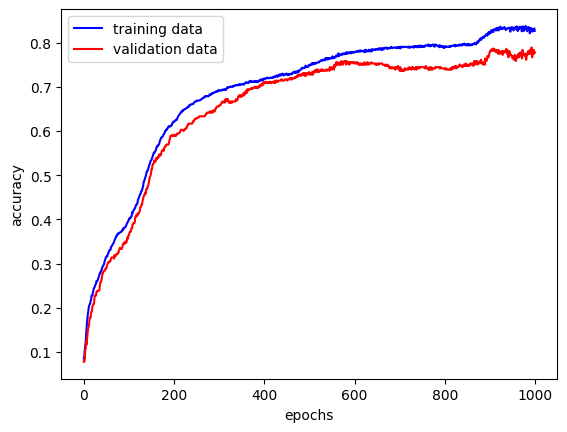

In [207]:
plt.figure()
plt.plot(range(len(train_accs)), train_accs, 'b', label='training data')
plt.plot(range(len(valid_accs)), valid_accs, 'r', label='validation data')
plt.legend(loc='upper left')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

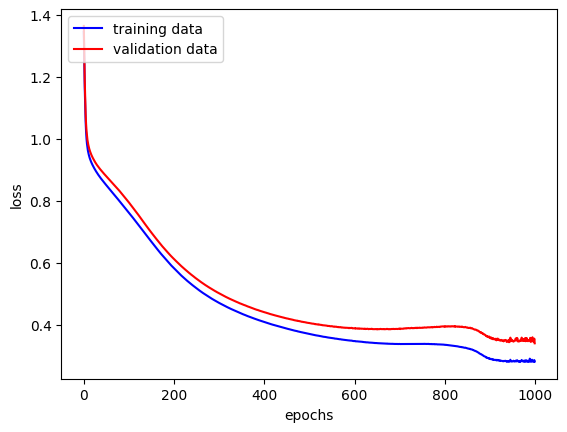

In [208]:
plt.figure()
plt.plot(range(len(train_losses)), train_losses, 'b', label='training data')
plt.plot(range(len(valid_losses)), valid_losses, 'r', label='validation data')
plt.legend(loc='upper left')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

### Ocena modelu na zbiorze testowym

In [209]:
net.evaluate(test_data, test_labels, "test")

Test data accuracy: 85.24%
test loss: 0.2647


(0.8523676880222841, 0.26471046109561275)

### Metoda do sprawdzania pojedynczych przykładów ze zbioru

Prediction:  [4]
[0 0 0 0 1 0 0 0 0 0]
Label:  4


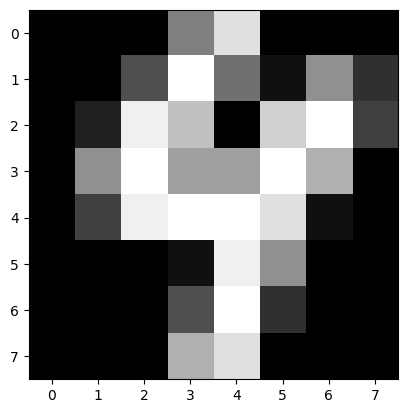

In [210]:
net.test_prediction(test_data, test_labels, 89)

### 5. Wnioski